<xarray.Dataset>
Dimensions:    (mixer: 2, flux: 140, frequency: 200)
Coordinates:
  * mixer      (mixer) <U1 'I' 'Q'
  * frequency  (frequency) float64 0.0 0.2 0.4 0.6 0.8 ... 39.2 39.4 39.6 39.8
  * flux       (flux) float64 -0.19 -0.1895 -0.189 ... -0.1215 -0.121 -0.1205
Data variables:
    q0_ro      (mixer, flux, frequency) float64 ...
    q1_ro      (mixer, flux, frequency) float64 ...
    q2_ro      (mixer, flux, frequency) float64 ...
Attributes:
    ro_IF:     [-327500000  -35550000 -214000000]
    xy_IF:     131500000
    xy_LO:     3580000000
    z_offset:  -0.054
q0_ro 3580.0 131.5 -0.054 (2, 140, 200)
q1_ro 3580.0 131.5 -0.054 (2, 140, 200)
q2_ro 3580.0 131.5 -0.054 (2, 140, 200)


C:\Users\shiau\AppData\Local\Temp\ipykernel_11860\458208598.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\shiau\AppData\Local\Temp\ipykernel_11860\458208598.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\shiau\AppData\Local\Temp\ipykernel_11860\458208598.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


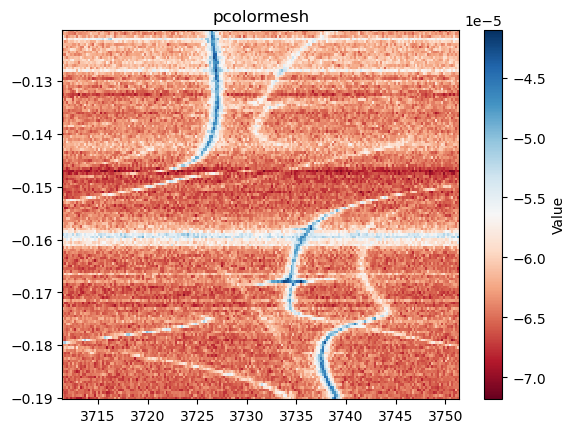

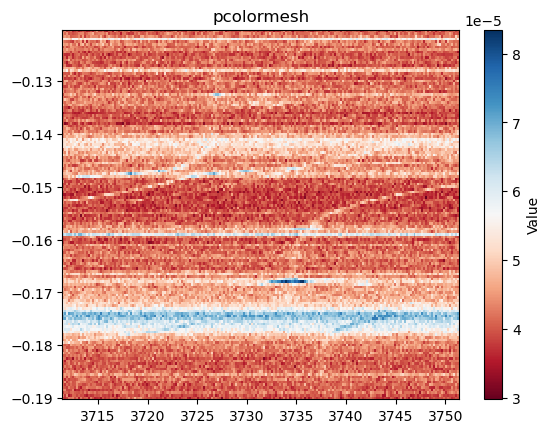

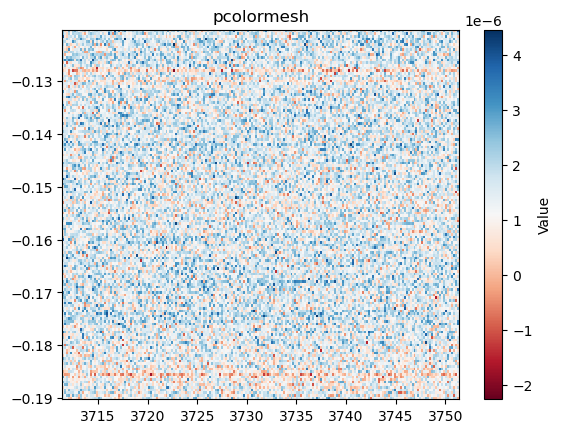

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def plot_ana_flux_dep_qubit( data, flux, dfs, freq_LO, freq_IF, abs_z, iq_rotate=0 ):
    """
    data shape ( 2, N, M )
    2 is I,Q
    N is freq
    M is flux
    """
    idata = data[0]
    qdata = data[1]
    zdata = (idata +1j*qdata)*np.exp(iq_rotate)
    s21 = zdata

    abs_freq = freq_LO+freq_IF+dfs
    # if type(ax)==None:
    fig, ax = plt.subplots()
    ax.set_title('pcolormesh')
    fig.show()
    _plot_spec2Dmap( abs_freq, flux, np.real(zdata), ax )
    # pcm = ax[0].pcolormesh( abs_freq, abs_z+flux, np.real(zdata), cmap='RdBu')# , vmin=z_min, vmax=z_max)
    # ax[0].axvline(x=freq_LO+freq_IF, color='b', linestyle='--', label='ref IF')
    # ax[0].axvline(x=freq_LO, color='r', linestyle='--', label='LO')
    # ax[0].axhline(y=abs_z, color='black', linestyle='--', label='idle z')
    # plt.colorbar(pcm, label='Value')
    # ax[0].legend()

    # Add a color bar
    # pcm = ax[1].pcolormesh( abs_freq, abs_z+flux, np.imag(zdata), cmap='RdBu')# , vmin=z_min, vmax=z_max)
    # ax[1].axvline(x=freq_LO+freq_IF, color='b', linestyle='--', label='ref IF')
    # ax[1].axvline(x=freq_LO, color='r', linestyle='--', label='LO')
    # ax[1].axhline(y=abs_z, color='black', linestyle='--', label='idle z')
    # plt.colorbar(pcm, label='Value')
    # ax[1].legend()


def _plot_spec2Dmap( freq, z_voltage, data, ax):
    pcm = ax.pcolormesh( freq, z_voltage, data, cmap='RdBu')# , vmin=z_min, vmax=z_max)
    # ax.axvline(x=freq_LO+freq_IF, color='b', linestyle='--', label='ref IF')
    # ax.axvline(x=freq_LO, color='r', linestyle='--', label='LO')
    # ax.axhline(y=abs_z, color='black', linestyle='--', label='idle z')
    plt.colorbar(pcm, label='Value')
    # ax.legend()

dataset = xr.open_dataset(r"d:\Data\5Qv4_0822_8_ITRIMixer\Spectrum_q0_xy_q1_z_20240605_1724.nc")
# dataset = freq_sweep_flux_dep_stable(ro_elements, z_elements, config, qmm, freq_range=freq_range, freq_resolution=freq_resolution, flux_settle_time=1, flux_range=flux_range, flux_resolution=flux_resolution, n_avg=n_avg, initializer=init_macro)
print(dataset)
# Plot
freqs = dataset.coords["frequency"].values
flux = dataset.coords["flux"].values
for i, (ro_name, data) in enumerate(dataset.data_vars.items()):
    xy_LO = dataset.attrs["xy_LO"]/1e6
    xy_IF_idle = dataset.attrs["xy_IF"]/1e6
    z_offset = dataset.attrs["z_offset"]
    print(ro_name, xy_LO, xy_IF_idle, z_offset, data.shape)
    # fig, ax = plt.subplots(2)
    plot_ana_flux_dep_qubit(data, flux, freqs, xy_LO, xy_IF_idle, z_offset)
    # ax[0].set_title(ro_name)
    # ax[1].set_title(ro_name)

plt.show()